# Metabolic Modeling in Microbial Community Engineering: A Case Study on Marine Coastal Oil Spills

## Introduction

Oil spills are among the most devastating environmental disasters, posing significant threats to marine ecosystems. The aftermath of such spills sees a surge in microbial communities capable of degrading the hydrocarbons present in the oil. These communities form intricate trophic networks, with various species playing specific roles in the degradation process.

In a recent study titled ["Harnessing the Potential of Native Microbial Communities for Bioremediation of Oil Spills in the Iberian Peninsula NW Coast"](https://www.frontiersin.org/articles/10.3389/fmicb.2021.633659/full), it was observed that oil spills lead to a drastic decrease in microbial diversity, with the enriched communities being dominated by hydrocarbon-degrading genera such as Alcanivorax, Pseudomonas, Acinetobacter, and others. These microbes possess the genetic potential to degrade a range of aromatic compounds, including toluene, a representative compound commonly found in oil spills.

Another study, ["Disentangling the microbial genomic traits associated with aromatic hydrocarbon degradation in a jet fuel-contaminated aquifer"](https://tmpfiles.org/dl/2982575/9e564aee-fb14-4a79-aa92-8ff63e9a2d6b.pdf), delves deeper into the metabolic pathways associated with hydrocarbon degradation. It proposes a metabolic model based on genome-centered analysis, functional predictions, and flux balance analysis (FBA) to describe the degradation process in jet-fuel-contaminated sites.

## Purpose of this Notebook

This Jupyter Notebook aims to utilize a community genome-scale metabolic model, incorporating the species identified in the aforementioned studies, to investigate the trophic network that emerges post a marine coastal oil spill. By focusing on toluene as a representative compound, we will explore how it is taken up and processed by the microbial community.

Through this exercise, we hope to:

1. **Understand the Dynamics**: Gain insights into the interactions and dynamics of microbial communities in response to oil spills.
2. **Highlight the Role of Metabolic Modeling**: Showcase the potential of metabolic modeling as a powerful tool in microbial community engineering.
3. **Provide a Framework**: Offer a structured approach for researchers and practitioners aiming to harness microbial communities for bioremediation purposes.

## Medium definition


Glycogen main storage polymer in cyanobacteria, and as much as 100-fold more abundant than other phytoplankton exudates, such as free monosaccharides or amino acids: https://ami-journals.onlinelibrary.wiley.com/doi/full/10.1111/1462-2920.14302

Glycinebetaine: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9321204/

We will begin with a set of GEMs from the CarveME databse corresponding to organisms with known capabilities to degrade hydrocarbons.:

* Marinobacter sp.
* Thalasospira sp.

In [1]:
import csv

medium = {}
with open("data/oilspill_medium.tsv", "r") as file:
    reader = csv.reader(file, delimiter='\t')
    next(reader)
    for row in reader:
        medium[row[0]] = float(row[1])

In [2]:
print([m.replace("EX_", "").replace("_e", "") for m in medium.keys()])

['cl_m', 'co2_m', 'cobalt2_m', 'cu2_m', 'dxyl_m', 'fe2_m', 'fe3_m', 'glyb_m', 'glycogen1500_m', 'h2o_m', 'h_m', 'hco3_m', 'k_m', 'mg2_m', 'mn2_m', 'nh4_m', 'no2_m', 'no3_m', 'o2_m', 'pi_m', 'so4_m', 'thm_m', 'tol_m', 'zn2_m']


In [3]:
from pathlib import Path
import cobra

# gem_dir = Path("/home/robaina/Databases/micom_carveme_genus/data")
gem_dir = Path("models/")
models = {}

for file in gem_dir.glob("*.json"):
    model_name = file.stem
    model = cobra.io.load_json_model(file)
    models[model_name] = model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-05


## Using Micom

In [4]:
import pandas as pd

taxo_df = pd.read_csv("data/micom_database.csv", sep=",", index_col=None)
taxo_df

,sample_id,id,abundance,file
0,oilspill,Acinetobacter_sp,100,models/Acinetobacter.json
1,oilspill,Alcanivorax_sp,100,models/Alcanivorax.json
2,oilspill,Alteromonas_sp,100,models/Alteromonas.json
3,oilspill,Flavobacterium_sp,100,models/Flavobacterium.json
4,oilspill,Marinobacter_sp,100,models/Marinobacter.json
5,oilspill,Oleibacter_sp,100,models/Oleibacter.json
6,oilspill,Polaribacter_sp,100,models/Polaribacter.json
7,oilspill,Pseudomonas_sp,100,models/Pseudomonas.json
8,oilspill,Rhodococcus_sp,100,models/Rhodococcus.json
9,oilspill,Thalassospira_sp,100,models/Thalassospira.json


In [5]:
from micom.workflows import build

manifest = build(taxonomy=taxo_df, model_db=None, out_folder="results/micom", cutoff=1e-2, threads=14 , solver="gurobi")
manifest

[17:42:10] WARNING  Found existing models for 1 samples. Will skip those. Delete the output folder if   ]8;id=6756;file:///home/robaina/miniconda3/envs/phycogem/lib/python3.11/site-packages/micom/workflows/build.py\build.py]8;;\:]8;id=293178;file:///home/robaina/miniconda3/envs/phycogem/lib/python3.11/site-packages/micom/workflows/build.py#95\95]8;;\
                    you would like me to rebuild them.                                                             

Output()

Read LP format model from file /tmp/tmp1kj3xf76.lp
Reading time = 0.13 seconds
: 15669 rows, 49781 columns, 209395 nonzeros


,sample_id,abundance,file
0,oilspill,100,oilspill.pickle


In [6]:
from micom import load_pickle

cgem = load_pickle("results/micom/oilspill.pickle")
cgem

Read LP format model from file /tmp/tmp71tjr4wt.lp
Reading time = 0.12 seconds
: 15669 rows, 49781 columns, 209395 nonzeros


Name,oilspill
Memory address,7fd91c311e90
Number of metabolites,15658
Number of reactions,24890
Number of genes,11823
Number of groups,0
Objective expression,1.0*community_objective
Compartments,"C_c__Acinetobacter_sp, C_p__Acinetobacter_sp, C_e__Acinetobacter_sp, m, C_c__Alcanivorax_sp, C_e__Alcanivorax_sp, C_p__Alcanivorax_sp, C_c__Alteromonas_sp, C_p__Alteromonas_sp, C_e__Alteromonas_sp, C_e__Flavobacterium_sp, C_p__Flavobacterium_sp, C_c__Flavobacterium_sp, C_c__Marinobacter_sp, C_p__Marinobacter_sp, C_e__Marinobacter_sp, C_c__Oleibacter_sp, C_p__Oleibacter_sp, C_e__Oleibacter_sp, C_c__Polaribacter_sp, C_p__Polaribacter_sp, C_e__Polaribacter_sp, C_c__Pseudomonas_sp, C_p__Pseudomonas_sp, C_e__Pseudomonas_sp, C_c__Rhodococcus_sp, C_p__Rhodococcus_sp, C_e__Rhodococcus_sp, C_c__Thalassospira_sp, C_p__Thalassospira_sp, C_e__Thalassospira_sp"


In [7]:
model_medium = {
    k.replace("_e", "_m"):v
    for k,v in medium.items()
    if k.replace("_e", "_m") in cgem.reactions
    }
model_medium

{'EX_cl_m': 10.00001,
 'EX_co2_m': 10.00001,
 'EX_cobalt2_m': 10.00001,
 'EX_cu2_m': 10.00001,
 'EX_dxyl_m': 0.0010759279637025066,
 'EX_fe2_m': 10.00001,
 'EX_fe3_m': 10.00001,
 'EX_glyb_m': 10.00001,
 'EX_glycogen1500_m': 0.0016726037783567375,
 'EX_h2o_m': 10.00001,
 'EX_h_m': 10.00001,
 'EX_hco3_m': 10.00001,
 'EX_k_m': 10.00001,
 'EX_mg2_m': 0.00421051740500682,
 'EX_mn2_m': 0.00034458876391465815,
 'EX_nh4_m': 10.00001,
 'EX_no2_m': 10.00001,
 'EX_no3_m': 10.00001,
 'EX_o2_m': 10.00001,
 'EX_pi_m': 10.00001,
 'EX_so4_m': 10.00001,
 'EX_thm_m': 10.00001,
 'EX_tol_m': 10.00001,
 'EX_zn2_m': 10.00001}

In [8]:
cgem.medium = model_medium
cgem.optimize()

,abundance,growth_rate,reactions,metabolites
compartments,,,,
Acinetobacter_sp,0.1,1.498129e-11,2904,1747
Alcanivorax_sp,0.1,0.000000e+00,2005,1329
Alteromonas_sp,0.1,0.000000e+00,2308,1509
Flavobacterium_sp,0.1,0.000000e+00,2868,1679
Marinobacter_sp,0.1,0.000000e+00,2761,1654
...,...,...,...,...
Polaribacter_sp,0.1,0.000000e+00,1973,1311
Pseudomonas_sp,0.1,0.000000e+00,3277,1869
Rhodococcus_sp,0.1,0.000000e+00,2639,1548


In [9]:
import pandas as pd

medium_df = pd.DataFrame.from_dict(model_medium, orient='index', columns=['flux'])
medium_df.index.name = 'reaction'
medium_df.reset_index(inplace=True)
medium_df.head()

,reaction,flux
0,EX_cl_m,10.000010
1,EX_co2_m,10.000010
2,EX_cobalt2_m,10.000010
3,EX_cu2_m,10.000010
4,EX_dxyl_m,0.001076


In [10]:
from micom.workflows import fix_medium

new_medium = fix_medium(manifest, model_folder="results/micom", medium=medium_df,
                    community_growth=0.5, min_growth=0.01,
                    max_import=10, threads=10)
new_medium

Output()

Read LP format model from file /tmp/tmpmtukluii.lp
Reading time = 0.13 seconds
: 15669 rows, 49781 columns, 209395 nonzeros


,reaction,metabolite,description,flux
0,EX_ca2_m,ca2_m,Calcium,0.002520
1,EX_cl_m,cl_m,Chloride,10.000010
2,EX_co2_m,co2_m,CO2,10.000010
3,EX_cobalt2_m,cobalt2_m,Co2+,10.000010
4,EX_cu2_m,cu2_m,Cu2+,10.000010
5,EX_dxyl_m,dxyl_m,1-deoxy-D-xylulose,0.001076
6,EX_fe2_m,fe2_m,Fe2+,10.000010
7,EX_fe3_m,fe3_m,Fe3+,10.000010
8,EX_glyb_m,glyb_m,Glycine betaine,10.000010
9,EX_glycogen1500_m,glycogen1500_m,"Glycogen (n=1500 repeat units) (glc alpha 1,4/...",0.001673


In [11]:
new_medium[["reaction","flux"]].to_csv('data/medium.tsv', sep='\t', index=False, header=False)

In [12]:
new_medium_dict = new_medium.set_index('reaction').to_dict()['flux']
cgem.medium = new_medium_dict
cgem.optimize()


Interrupt request received


[17:44:03] WARNING  solver encountered an error interrupted                                         ]8;id=224666;file:///home/robaina/miniconda3/envs/phycogem/lib/python3.11/site-packages/micom/solution.py\solution.py]8;;\:]8;id=351009;file:///home/robaina/miniconda3/envs/phycogem/lib/python3.11/site-packages/micom/solution.py#224\224]8;;\

In [ ]:
from micom.media import minimal_medium

minmed = minimal_medium(cgem, 0.8, minimize_components=False, open_exchanges=True)
minmed

In [ ]:
from micom.workflows import grow

res = grow(manifest, model_folder="results/micom/", medium=new_medium, tradeoff=0.5, threads=12)
res.exchanges.to_csv("results/micom/exchanges.tsv", sep="\t")

Output()

Read LP format model from file /tmp/tmpkfio154o.lp
Reading time = 0.34 seconds
: 15669 rows, 49781 columns, 209395 nonzeros


## Plot interaction graph

In [ ]:
import pandas as pd

exchanges_df = pd.read_csv("results/micom/exchanges.tsv", sep="\t")
export_df = exchanges_df[exchanges_df["direction"] == "export"]
import_df = exchanges_df[exchanges_df["direction"] == "import"]
merged_df = pd.merge(import_df, export_df, on="metabolite", how="outer")
final_df = merged_df[["sample_id_x", "taxon_x", "taxon_y", "metabolite"]]
final_df.columns = ["sample_id", "donor", "receiver", "compound"]
final_df.loc[final_df["donor"].isnull(), "donor"] = None

final_df.head()

/tmp/ipykernel_8228/1454815240.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[final_df["donor"].isnull(), "donor"] = None


,sample_id,donor,receiver,compound
0,oilspill,medium,NaN,nh4_m
1,oilspill,medium,NaN,pi_m
2,oilspill,medium,NaN,tol_m
3,oilspill,medium,NaN,zn2_m
4,oilspill,medium,NaN,k_m


In [ ]:
"tol_e" in merged_df.metabolite.unique()

True

In [ ]:
"tol_e" in final_df.compound.unique()

True

In [ ]:
import networkx as nx
import json


def generate_bipartite_graph(exchanges_file_path: str, hide_taxa: list[str] = None, hide_metabolites: list[str] = None, flux_cutoff: float = None) -> nx.DiGraph:
    """
    Generates a bipartite graph from a file containing exchange data.

    Args:
        exchanges_file_path (str): The path to the file containing exchange data.
        hide_taxa (list[str], optional): A list of taxa to hide from the graph. Defaults to None.
        hide_metabolites (list[str], optional): A list of metabolites to hide from the graph. Defaults to None.
        flux_cutoff (float, optional): The minimum flux value for an edge to be included in the graph. Defaults to None.

    Returns:
        nx.DiGraph: The generated bipartite graph.
    """
    G = nx.DiGraph()

    with open(exchanges_file_path, 'r') as f:
        for line in f:
            if "taxon" in line:
                continue
            cols = line.strip().split('\t')
            taxon = cols[1]
            metabolite = cols[7].replace("_e", "")
            direction = cols[8]
            flux = abs(float(cols[5]))
            if hide_taxa is None or taxon not in hide_taxa:
                G.add_node(taxon, bipartite=0)
            if hide_metabolites is None or metabolite not in hide_metabolites:
                G.add_node(metabolite, bipartite=1)
            if flux_cutoff is None or flux >= flux_cutoff:
                if direction == 'export':
                    G.add_edge(taxon, metabolite)
                elif direction == 'import':
                    G.add_edge(metabolite, taxon)

    if hide_taxa is not None:
        G.remove_nodes_from(hide_taxa)
    if hide_metabolites is not None:
        G.remove_nodes_from(hide_metabolites)

    G.remove_nodes_from(list(nx.isolates(G)))

    bipartite_graph = G
    data = nx.readwrite.json_graph.node_link_data(G)

    with open('results/micom/graph.json', 'w') as f:
        json.dump(data, f)

    return bipartite_graph


exchanges_file_path = "results/micom/exchanges.tsv"
# hidden_taxa = [
#     "medium", "Alcanivorax_sp", "Oleibacter_sp",
#     "Flavobacterium_sp", "Alteromonas_sp", "Rhodococcus_sp",
#     "Marinobacter_sp", "Thalassospira_sp", "Pseudomonas_sp",
#     ]
hidden_taxa = [
    "medium", "Alcanivorax_sp", "Oleibacter_sp",
    "Flavobacterium_sp","Rhodococcus_sp",
    ]
hidden_metabolites = ['h', 'h2', 'btn', 'ca2', 'cl', 'co2', 'cu2', 'fe2', 'fe3', 'k', 'no2', 'no3', 'so4', 'thm', 'zn2', 'pi', 'h2o', 'o2', 'cobalt2', 'nh4', 'hco3', 'mg2', 'mn2']

hidden_metabolites_extended = []
for metabolite in hidden_metabolites:
    hidden_metabolites_extended.append(metabolite + "_m")
    hidden_metabolites_extended.append(metabolite + "_e")

bipartite_graph = generate_bipartite_graph(
    exchanges_file_path,
    hide_taxa=hidden_taxa,
    hide_metabolites=hidden_metabolites, #_extended,
    flux_cutoff=0.0
    )

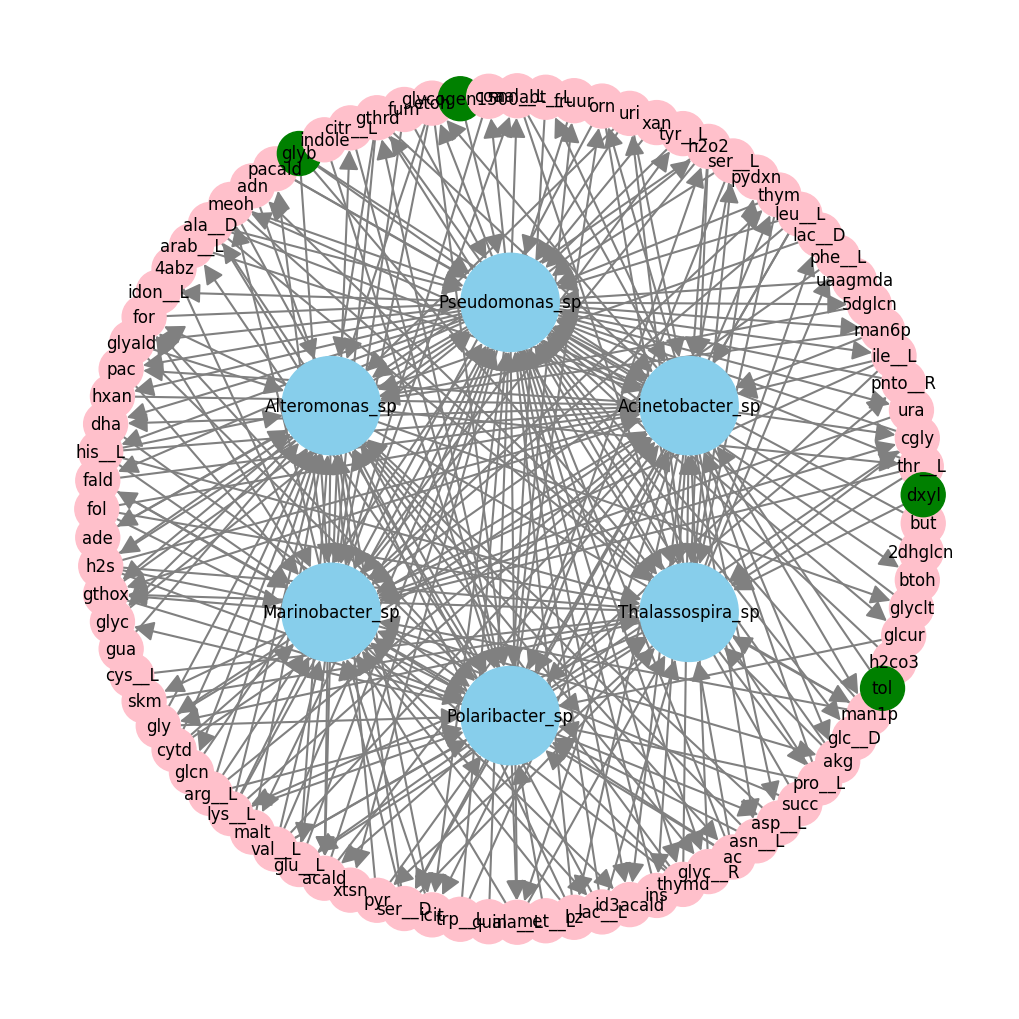

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt


large_node_size = 5000
small_node_size = 1000

# Identify the compounds for which "medium" is a donor
medium_donors = [
    m.replace("_m", "")
    for m in final_df[final_df["donor"] == "medium"]["compound"].unique()
]
node_colors = [
    'skyblue' if bipartite == 0 else 'green' if node in medium_donors else 'pink'
    for node, bipartite in nx.get_node_attributes(bipartite_graph, 'bipartite').items()
]

# Define the layout
shell_layout = nx.shell_layout(bipartite_graph, [set(n for n, d in bipartite_graph.nodes(data=True) if d['bipartite']==0), set(n for n, d in bipartite_graph.nodes(data=True) if d['bipartite']==1)])

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(
    bipartite_graph,
    shell_layout,
    with_labels=True,
    node_size=[
        large_node_size if bipartite == 0 else small_node_size
        for bipartite in nx.get_node_attributes(bipartite_graph, 'bipartite').values()
    ],
    node_color=node_colors,
    edge_color='gray',
    arrowsize=30,
    width=1.5
)
nx.draw_networkx_edge_labels(
    bipartite_graph,
    shell_layout,
    edge_labels=nx.get_edge_attributes(bipartite_graph, 'weight'),
)
plt.show()

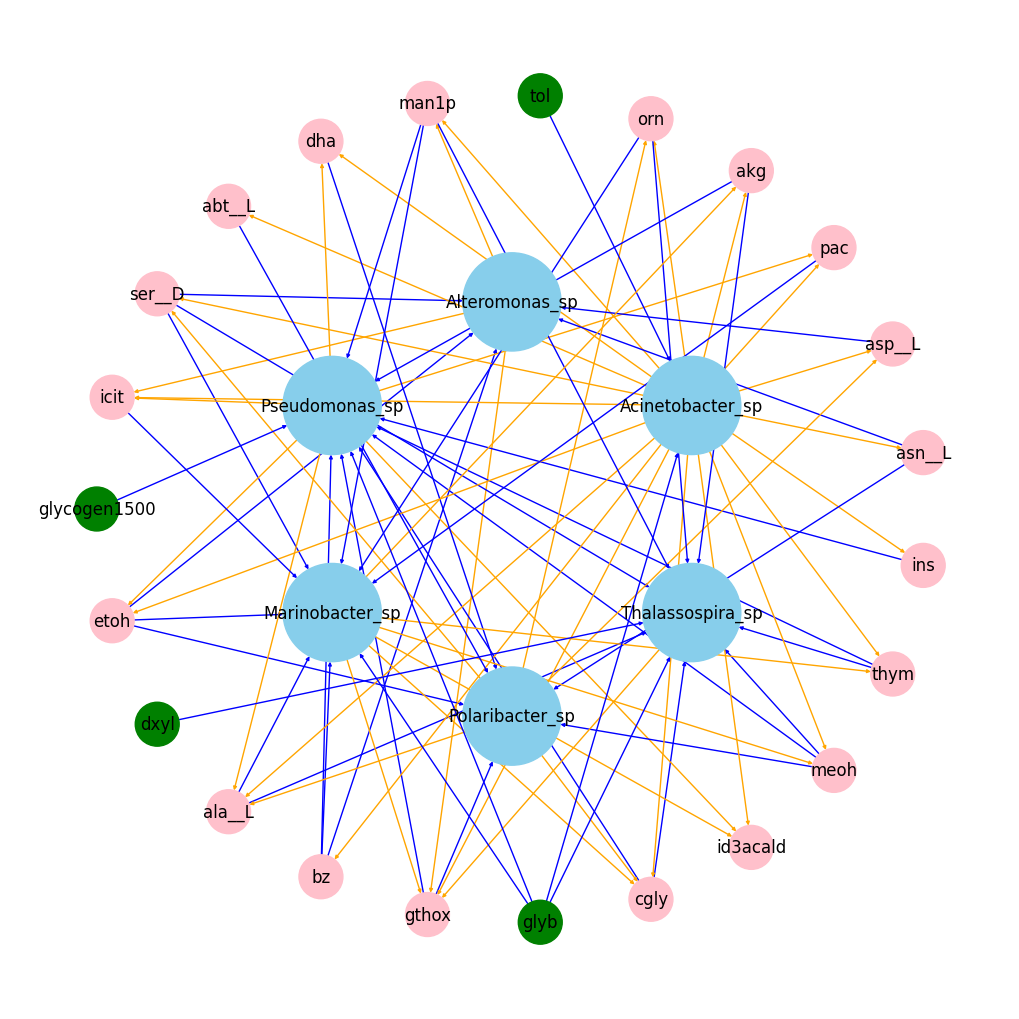

In [ ]:
# Identify the compounds for which "medium" is a donor
medium_donors = [
    m.replace("_m", "")
    for m in final_df[final_df["donor"] == "medium"]["compound"].unique()
]

# Identify the nodes that are directly connected to toluene
direct_nodes = list(bipartite_graph.neighbors('tol')) + ["tol"]

# Identify the nodes that are indirectly connected to toluene
indirect_nodes = [
    neighbor
    for node in direct_nodes
    for neighbor in bipartite_graph.neighbors(node)
]

# Identify the nodes that are connected to the indirect nodes
indirect_nodes_extended = [
    neighbor
    for node in indirect_nodes
    for neighbor in bipartite_graph.neighbors(node)
]

# Create a subgraph that only includes the nodes identified above
subgraph_nodes = direct_nodes + indirect_nodes + indirect_nodes_extended
subgraph = bipartite_graph.subgraph(subgraph_nodes)

# Identify the taxa nodes that are connected to the medium donors
medium_donor_edges = [
    (u, v)
    for u, v in bipartite_graph.edges()
    if u in medium_donors and bipartite_graph.nodes[v]['bipartite'] == 0
]

# Create a new graph that includes the nodes and edges of the subgraph, as well as the medium donor edges
extended_subgraph = nx.DiGraph(subgraph)

# Add the medium donor edges to the extended subgraph
extended_subgraph.add_edges_from(medium_donor_edges)

# Assign all nodes missing the 'bipartite' attribute to class 1 (compound)
for node in extended_subgraph.nodes():
    if 'bipartite' not in extended_subgraph.nodes[node]:
        extended_subgraph.nodes[node]['bipartite'] = 1

# Define the layout for the extended subgraph
shell_layout_extended_subgraph = nx.shell_layout(
    extended_subgraph,
    [
        set(n for n, d in extended_subgraph.nodes(data=True) if d['bipartite'] == 0),
        set(n for n, d in extended_subgraph.nodes(data=True) if d['bipartite'] == 1)
    ]
)

# Draw the extended subgraph
plt.figure(figsize=(10, 10))
nx.draw(
    extended_subgraph,
    shell_layout_extended_subgraph,
    with_labels=True,
    node_size=[
        large_node_size if bipartite == 0 else small_node_size
        for bipartite in nx.get_node_attributes(extended_subgraph, 'bipartite').values()
    ],
    node_color=[
        'skyblue' if bipartite == 0 else 'green' if node in medium_donors else 'pink'
        for node, bipartite in nx.get_node_attributes(extended_subgraph, 'bipartite').items()
    ],
    edge_color=[
        'blue' if extended_subgraph.nodes[v]['bipartite'] == 0 else 'orange'
        for u, v in extended_subgraph.edges()
    ],
    arrowsize=5,
    width=1.0
)
nx.draw_networkx_edge_labels(
    extended_subgraph,
    shell_layout_extended_subgraph,
    edge_labels=nx.get_edge_attributes(extended_subgraph, 'weight'),
)
plt.show()

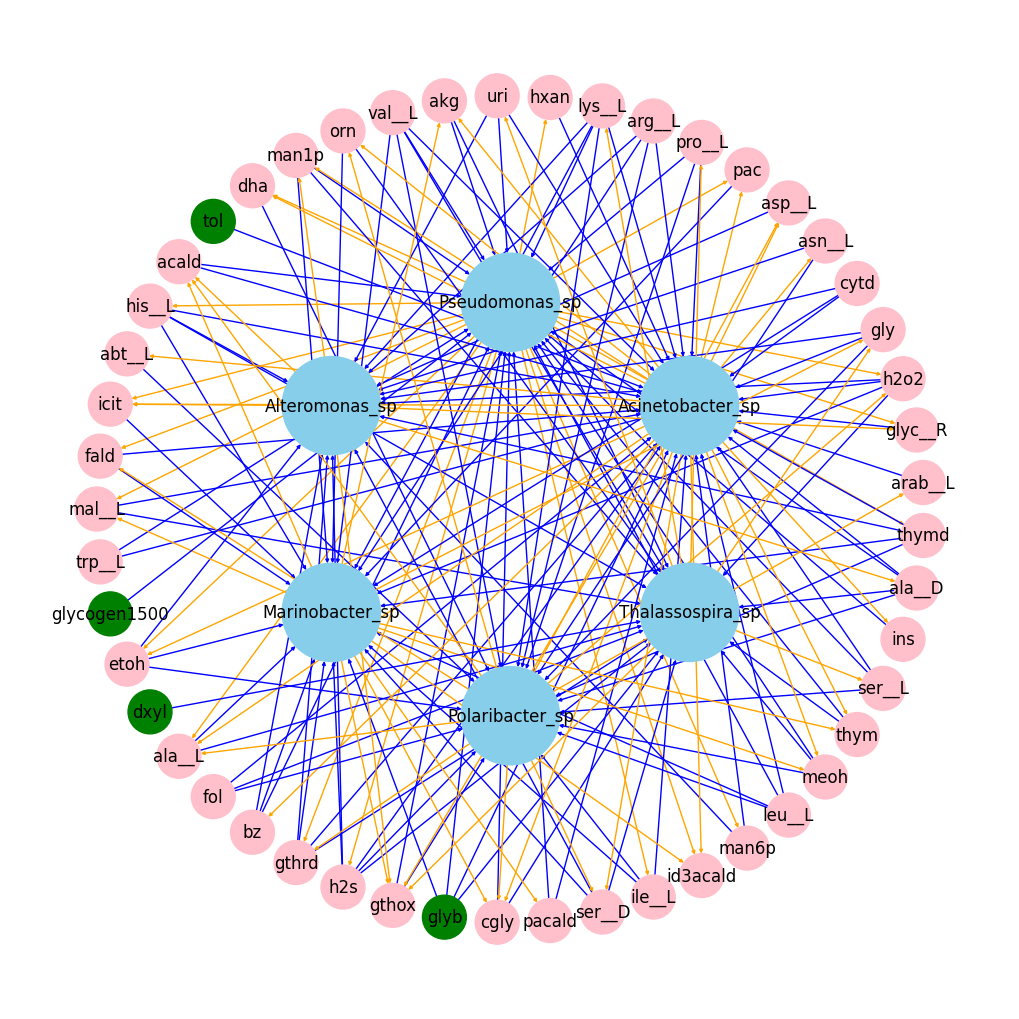

In [ ]:
# Identify the compounds for which "medium" is a donor
medium_donors = [
    m.replace("_m", "")
    for m in final_df[final_df["donor"] == "medium"]["compound"].unique()
]

# Identify the nodes that are directly connected to toluene
direct_nodes = list(bipartite_graph.neighbors('tol')) + ["tol"]

# Identify the nodes that are indirectly connected to toluene
indirect_nodes = [
    neighbor
    for node in direct_nodes
    for neighbor in bipartite_graph.neighbors(node)
]

# Identify the nodes that are connected to the indirect nodes
indirect_nodes_extended = [
    neighbor
    for node in indirect_nodes
    for neighbor in bipartite_graph.neighbors(node)
]

# Convert the directed graph to an undirected graph
undirected_graph = bipartite_graph.to_undirected()

# Identify the compounds that are connected to Acinetobacter in the undirected graph
acinetobacter_compounds = [n for n in undirected_graph.neighbors('Acinetobacter_sp') if undirected_graph.nodes[n]['bipartite'] == 1]


# Identify the species that are connected to these compounds
species_connected_to_acinetobacter_compounds = [
    n
    for compound in acinetobacter_compounds
    for n in bipartite_graph.neighbors(compound)
    if bipartite_graph.nodes[n]['bipartite'] == 0
]

# Create a subgraph that only includes the nodes identified above
subgraph_nodes = direct_nodes + indirect_nodes + indirect_nodes_extended + acinetobacter_compounds + species_connected_to_acinetobacter_compounds
subgraph = bipartite_graph.subgraph(subgraph_nodes)

# Identify the taxa nodes that are connected to the medium donors
medium_donor_edges = [
    (u, v)
    for u, v in bipartite_graph.edges()
    if u in medium_donors and bipartite_graph.nodes[v]['bipartite'] == 0
]

# Create a new graph that includes the nodes and edges of the subgraph, as well as the medium donor edges
extended_subgraph = nx.DiGraph(subgraph)

# Add the medium donor edges to the extended subgraph
extended_subgraph.add_edges_from(medium_donor_edges)

# Assign all nodes missing the 'bipartite' attribute to class 1 (compound)
for node in extended_subgraph.nodes():
    if 'bipartite' not in extended_subgraph.nodes[node]:
        extended_subgraph.nodes[node]['bipartite'] = 1

# Define the layout for the extended subgraph
shell_layout_extended_subgraph = nx.shell_layout(
    extended_subgraph,
    [
        set(n for n, d in extended_subgraph.nodes(data=True) if d['bipartite'] == 0),
        set(n for n, d in extended_subgraph.nodes(data=True) if d['bipartite'] == 1)
    ]
)

# Draw the extended subgraph
plt.figure(figsize=(10, 10))
nx.draw(
    extended_subgraph,
    shell_layout_extended_subgraph,
    with_labels=True,
    node_size=[
        large_node_size if bipartite == 0 else small_node_size
        for bipartite in nx.get_node_attributes(extended_subgraph, 'bipartite').values()
    ],
    node_color=[
        'skyblue' if bipartite == 0 else 'green' if node in medium_donors else 'pink'
        for node, bipartite in nx.get_node_attributes(extended_subgraph, 'bipartite').items()
    ],
    edge_color=[
        'blue' if extended_subgraph.nodes[v]['bipartite'] == 0 else 'orange'
        for u, v in extended_subgraph.edges()
    ],
    arrowsize=5,
    width=1.0
)
nx.draw_networkx_edge_labels(
    extended_subgraph,
    shell_layout_extended_subgraph,
    edge_labels=nx.get_edge_attributes(extended_subgraph, 'weight'),
)
plt.show()

In [ ]:
import ipycytoscape
import math

# Assuming 'extended_subgraph' is your NetworkX graph
G = extended_subgraph

# Define the color codes
color_dict = {'0': 'skyblue', '1': 'pink'}
color_dict.update({node: 'green' for node in medium_donors})

# Create a new Cytoscape widget
cyto = ipycytoscape.CytoscapeWidget()

# Get the nodes for each shell
shell1 = [node for node, data in G.nodes(data=True) if data['bipartite'] == 0]
shell2 = [node for node, data in G.nodes(data=True) if data['bipartite'] == 1]

# Define the radius for each shell
radius1 = 100
radius2 = 200

# Add nodes to the cytoscape widget with positions to mimic the shell layout
for i, node in enumerate(shell1):
    angle = 2 * math.pi * i / len(shell1)
    x = radius1 * math.cos(angle)
    y = radius1 * math.sin(angle)
    node_instance = ipycytoscape.Node()
    node_instance.data['id'] = node
    node_instance.data['label'] = node  # Set the label
    node_instance.classes = color_dict[str(G.nodes[node]['bipartite'])]
    node_instance.position = {'x': x, 'y': y}
    cyto.graph.add_node(node_instance)

for i, node in enumerate(shell2):
    angle = 2 * math.pi * i / len(shell2)
    x = radius2 * math.cos(angle)
    y = radius2 * math.sin(angle)
    node_instance = ipycytoscape.Node()
    node_instance.data['id'] = node
    node_instance.data['label'] = node  # Set the label
    node_instance.classes = color_dict[str(G.nodes[node]['bipartite'])]
    node_instance.position = {'x': x, 'y': y}
    cyto.graph.add_node(node_instance)

# Add edges to the cytoscape widget
for edge in G.edges():
    edge_instance = ipycytoscape.Edge()
    edge_instance.data['source'] = edge[0]
    edge_instance.data['target'] = edge[1]
    cyto.graph.add_edge(edge_instance)

# Set the style for the nodes and edges
cyto.set_style([
    {
        'selector': 'node',
        'css': {
            'content': 'data(label)',
            'text-valign': 'center',
            'color': 'black',
            'text-outline-width': 2,
            'text-outline-color': 'data(classes)',
            'background-color': 'data(classes)'
        }
    },
    {
        'selector': 'edge',
        'css': {
            'line-color': 'grey'
        }
    }
])

# Display the widget
display(cyto)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'content': 'd…